<a href="https://colab.research.google.com/github/ragalaa/Directory/blob/master/Image__recognition_using_tensor_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pillow

In [0]:
import tensorflow as tf
import matplotlib.image as mp_img
import matplotlib.pyplot as plot
import os

In [0]:
filename = "./WelcomeScan.jpg"

In [0]:
image = mp_img.imread(filename)

In [5]:
print(" Image shape:", image.shape)

 Image shape: (768, 1024, 3)


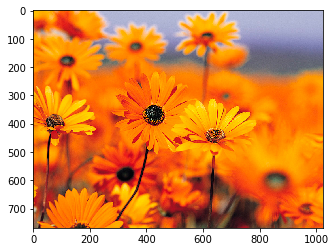

In [8]:
# print("Image Array= ", image)
plot.imshow(image)
plot.show()

Transposed Image shape:  (1024, 768, 3)


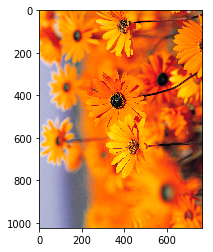

In [17]:
x = tf.Variable(image,name='x')
x
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    ## Perm has special meaning Original Axis indexes 0,1,2
    ## new order 1,0,2 the first abd second axis are swapped
    ## this swaps the width and height of image but leaves the third axis
    transpose = tf.transpose(x,perm=[1,0,2])
    result = sess.run(transpose)
    
    print("Transposed Image shape: ",result.shape)
    plot.imshow(result)
    plot.show()
    
  

In [0]:
#### See thenshape along the new axis is transformed from ( 768,1024,3) into (1024,768,3)

# Read in a list of images in tensor flow using a queue and co0rdinates
# ReSize  images to be of the same dimensions
# show image summaries on tensor baord.

In [0]:
from PIL import Image ## convert Jpeg to jpg

image_list = ["./Babyfeet.JPG",
              "./Flower.jpg",
             "./Scenary.jpg",
             "./Scenary2.jpg",
             "./WelcomeScan.jpg"]


In [28]:
## using Queue's construct in Tensor flow to read the files
filename_queue = tf.train.string_input_producer(image_list)
## reading one file from queue
image_reader = tf.WholeFileReader()
## Instatinate the session to execute tesnpr operation


with tf.Session() as sess:
### these are multi threaded hence tensor provided coordinator to read 
## this make working wity multi thread and process easy
    coord = tf.train.Coordinator()
# Queue are best way to execute Asysncromouys using multiple threads
    threads = tf.train.start_queue_runners(sess=sess,coord=coord)
    ## store all image tensor in below list
    image_tensor = []
    for i in range(len(image_list)):
       ## read whole file from the queue, the first returned values
        ## in the tuple is the  file name which we are ignoring.
        _, image_file = image_reader.read(filename_queue)
        ## tensor flowhas lot of helper fucntion to decode the JPG file 
        ## this will turn it into a Tensor which can use in training
        image = tf.image.decode_jpeg(image_file)
        ## let's resize before adding to list
        image = tf.image.resize_images(image,[224,224])
        image.set_shape((224,224,3))
        
        ##get an image tensor and print its values
        image_array = sess.run(image)
        print(image_array.shape)
        ### PIL library to show the image
        Image.fromarray(image_array.astype('uint8'),'RGB').show()
        
        ## Convert to 3-D image tensor to 4-D image tensor
        image_tensor.append(tf.expand_dims(image_array,0))
        
    ## Finishoff the filename queueu coordinator
    
    coord.request_stop()     
    coord.join(threads) 
    
    Index = 0
    
    ## Write image summary
    summary_writer = tf.summary.FileWriter('./m4example2',graph=sess.graph)
    for image_tensor1 in image_tensor:
        summary_str = sess.run(tf.summary.image("Image-"+ str(Index),image_tensor1))
        summary_writer.add_summary(summary_str)
        Index += 1
        
    summary_writer.close()    
        
        
        
        
    


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
